In [11]:
using LinearAlgebra
using Plots

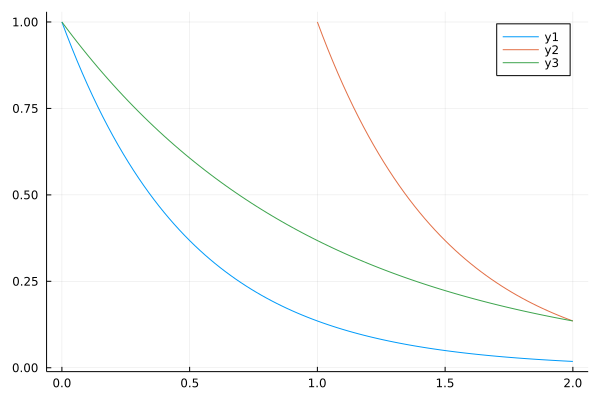

In [38]:
t = LinRange(0,2,101)
T = 1
# Time shifting. Delay shifts the plot to right. Plot starts late
y1 = exp.(-2*t)
y2 = exp.(-2(t .- T))
plot(t,y1)
plot!(t[51:101],y2[51:101])

# Time scaling
a = 0.5
y3 = exp.(-2*(a*t))
plot!(t, y3)

# T

In [58]:
using Polynomials

a = [2, 1, 1]
p = Polynomial(a)
r = roots(p)
p1 = fromroots(r)
p2 = Polynomial(round.(p1.coeffs, digits = 5))

Polynomial(2.0 + 1.0*x + 1.0*x^2)

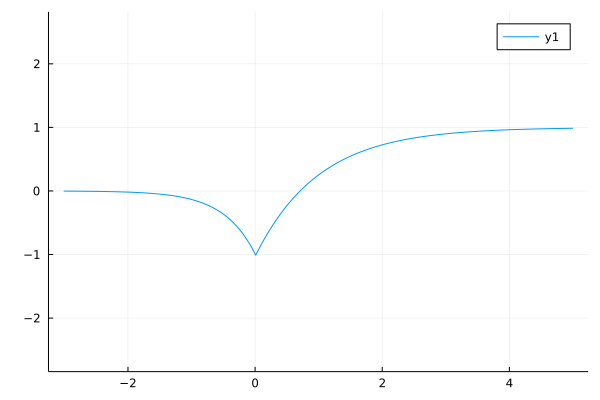

In [75]:
# Convolution 2.9
using DSP

t1 = -10:0.01:0
g1 = -2exp.(2t1)
t2 = 0:.01:10
g2 = 2exp.(-t2)
t = [t1;t2]
g = [g1;g2]
f = [zeros(size(g1)); ones(size(g2))]
t = -20:0.01:5
c = 0.01*conv(f,g)
plot(t[1700:end],c[1700:length(t)], aspect_ratio = :equal)



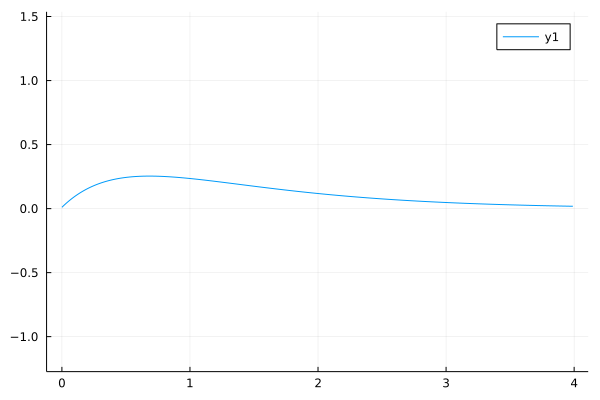

In [85]:
# Convolution 2.8
t1 = 0:0.01:10
g1 = exp.(-t1)
t2 = 0:0.01:10
g2 = exp.(-2t2)
t = -0:0.01:30
c = 0.01*conv(g1,g2)
plot(t[1:400],c[1:400], aspect_ratio = :equal)

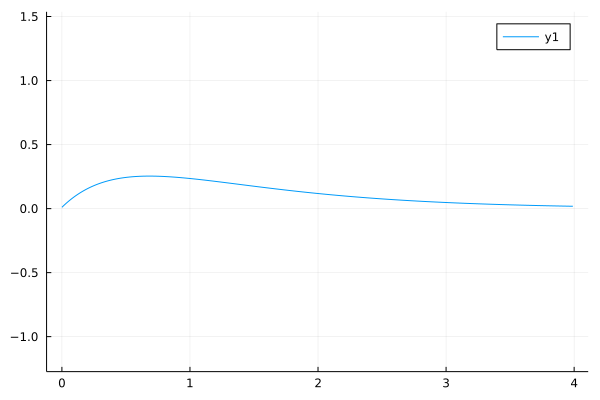

In [106]:
function conv_naive(u, v)
    lu = length(u)
    lv = length(v)
    lc = lu + lv
    vn = [v; zeros(lu)]  # pad zeros to make size of signals equal
    un = [u; zeros(lv)]  # pad zeros to make size of signals equal
    c = zeros(lc)
    vr = reverse(vn)
    for i = 1:lc
        c[i] = vr[end-i+1:end]'*un[1:i]
    end
    return c
end
plot(t[1:400],0.01*conv_naive(g1, g2)[1:400], aspect_ratio = :equal)

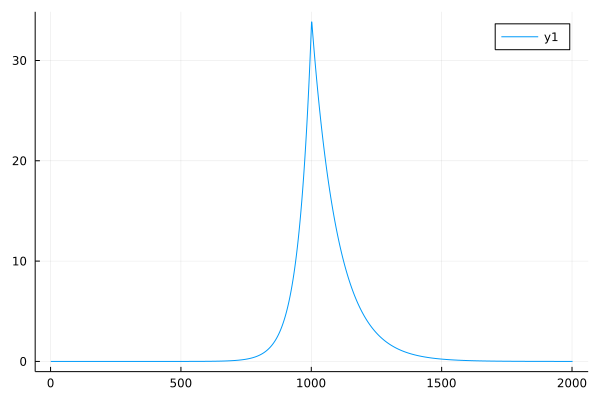

In [159]:
function corr_naive(u, v)
    lu = length(u)
    lv = length(v)
    lc = lu + lv
    vn = v  # pad zeros to make size of signals equal
    un = u  # pad zeros to make size of signals equal
    c = zeros(lc)
    for i=1:lu
        c[end-i+1] = vn[1:i]'*un[end-i+1:end]
    end
    for i = 1:lv
        c[end-lu-i+1] = vn[i:end]'*un[1:end-i+1]
    end
    return c
end

# plot(t[1:400],g1[1:400])
# plot!(t[1:400],g2[1:400])
# plot!(t[1:400],0.01*corr_naive(g1, g2)[1:400], aspect_ratio = :equal)
# plot!(t[1:400],xcorr(g1, g2, padmode = :none)[1:400], aspect_ratio = :equal)
plot(corr_naive(g1, g2))


In [156]:
v = [1, 1]
u = [1, 1]

plot(xcorr(g1,g2),corr_naive(g1,g2)[2:end])
v = [xcorr(g1,g2) corr_naive(g1,g2)[1:end-1]]

2001×2 Matrix{Float64}:
 2.06115e-9   2.06115e-9
 4.14344e-9   4.14344e-9
 6.24748e-9   6.24748e-9
 8.37392e-9   8.37392e-9
 1.05234e-8   1.05234e-8
 1.26966e-8   1.26966e-8
 1.48943e-8   1.48943e-8
 1.71169e-8   1.71169e-8
 1.93654e-8   1.93654e-8
 2.16404e-8   2.16404e-8
 2.39425e-8   2.39425e-8
 2.62727e-8   2.62727e-8
 2.86315e-8   2.86315e-8
 ⋮            
 0.000518414  0.000559337
 0.000477184  0.000518414
 0.000435635  0.000477184
 0.000393757  0.000435635
 0.000351536  0.000393757
 0.000308963  0.000351536
 0.000266023  0.000308963
 0.000222705  0.000266023
 0.000178997  0.000222705
 0.000134885  0.000178997
 9.03572e-5   0.000134885
 4.53999e-5   9.03572e-5

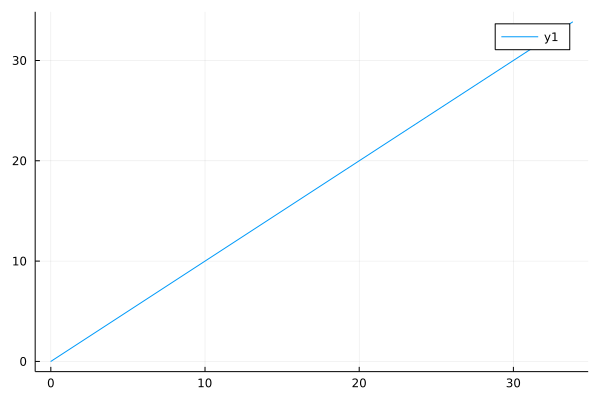

In [172]:
plot(xcorr(g1, g2), conv_naive(g1, reverse(g2))[1:end-1])
plot!(xticks = 0:10:40)
plot!(yticks = 0:10:40)

In [19]:
T0 = pi
N0 = 256
T = T0/N0
t =  0:T:(N0-1)*T
f1 = exp.(-t/2)
f1[1] = 0.604
ω = 2pi/T0

function Dn(f,n,ω,T)
    T0 = 2pi/ω
    N0 = Int(floor(T0/T))
    Ω = (2pi)/N0  # Ω = ωT
    Ωn = Ω*n
    D = 0
    
    for i=1:N0
        D = D + f[i]*exp((Ωn*(i-1))*-1im)
    end
    return D/N0
end

abs(Dn(f1, 8, ω, T))

n = 10
Fs = zeros(n)
for i=2:n
    Fs[i] = 2*abs(Dn(f1,i-1,ω,T))
end
Fs[1] = abs(Dn(f1,0,ω,T))
Fs

10-element Vector{Float64}:
 0.5042813411509556
 0.2446001012008663
 0.12507168483408376
 0.08371872827797401
 0.06286187357305636
 0.0503019943502711
 0.04191110948189778
 0.03590855872805221
 0.03140093294679213
 0.027890864896404632

In [203]:
exp(0.024*-1im)

0.9997120138237345 - 0.02399769606635429im